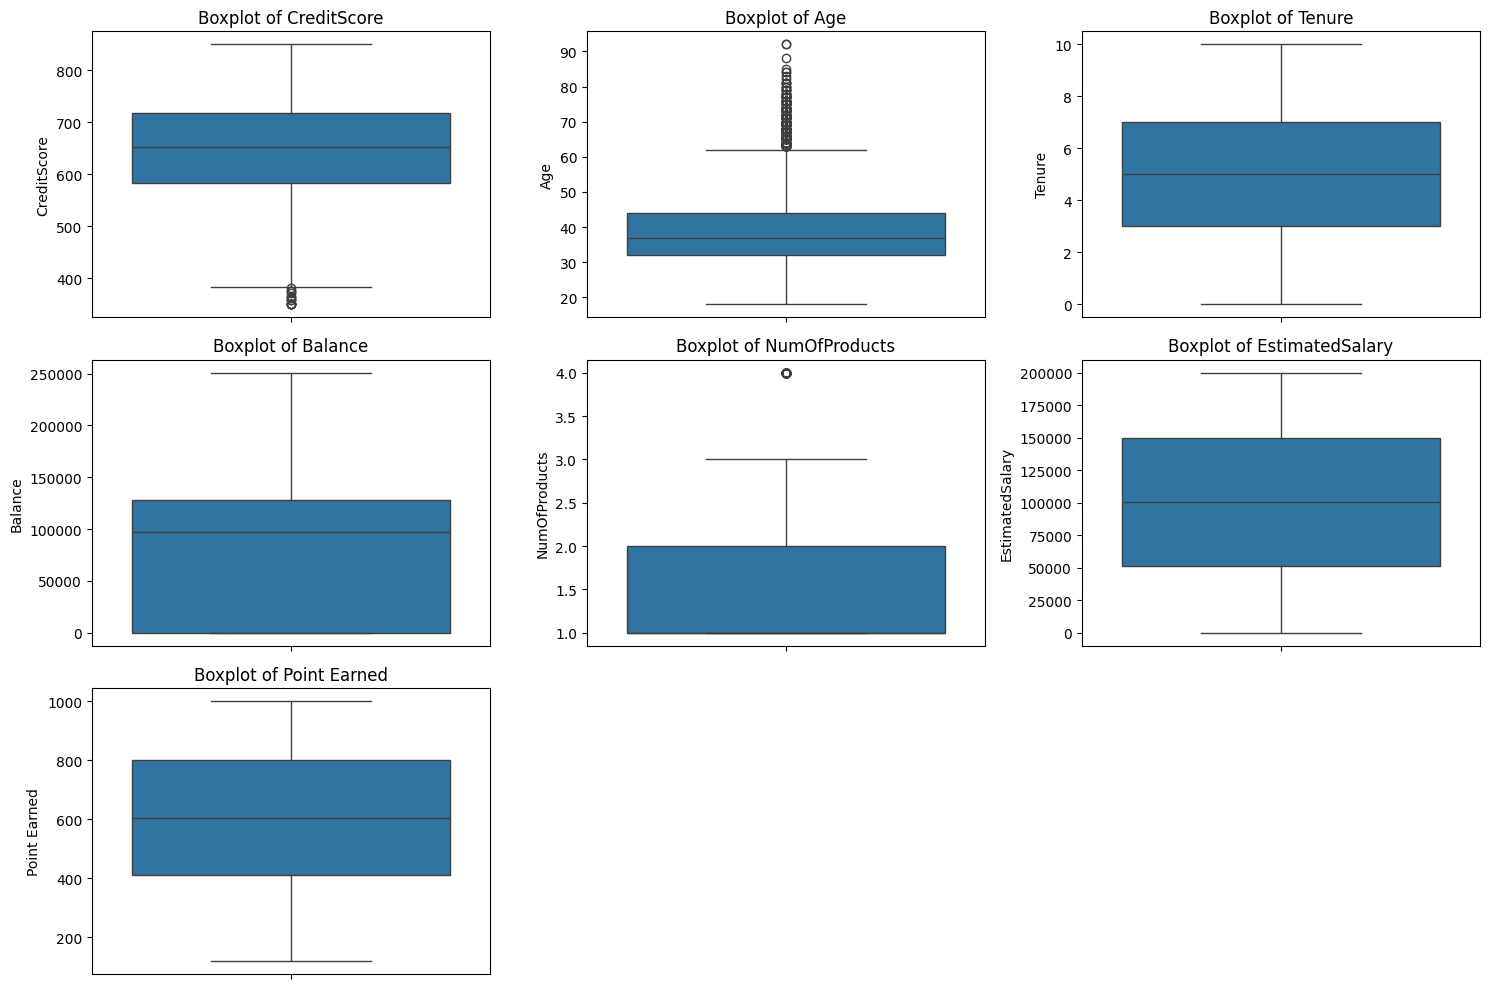

Model Performance Comparison:
SVM (with outliers): 0.8340
SVM (without outliers): 0.8341
Random Forest (with outliers): 0.8405
Random Forest (without outliers): 0.8320


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load dataset
file_path = "/content/Bank-Customer-Attrition-Insights-Data.csv"
df = pd.read_csv(file_path)

# Select numerical columns for outlier detection
numerical_cols = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary", "Point Earned"]

# Box plots for outlier detection
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Function to remove outliers using IQR
def remove_outliers(df, columns):
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

# Removing outliers from relevant numerical columns
df_clean = remove_outliers(df, ["Age", "Balance", "Point Earned"])

# Encoding categorical variables
label_encoders = {}
for col in ["Geography", "Gender", "Card Type"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    df_clean[col] = le.transform(df_clean[col])
    label_encoders[col] = le

# Selecting features and target variable
features = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary", "Point Earned"]
target = "Exited"

# Splitting datasets (with and without outliers)
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(
    df_clean[features], df_clean[target], test_size=0.2, random_state=42
)

# Standardizing features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train_clean = scaler.fit_transform(X_train_clean)
X_test_clean = scaler.transform(X_test_clean)

# Training SVM and Random Forest models on both datasets
models = {
    "SVM (with outliers)": SVC(),
    "SVM (without outliers)": SVC(),
    "Random Forest (with outliers)": RandomForestClassifier(),
    "Random Forest (without outliers)": RandomForestClassifier(),
}

# Training models
models["SVM (with outliers)"].fit(X_train, y_train)
models["SVM (without outliers)"].fit(X_train_clean, y_train_clean)
models["Random Forest (with outliers)"].fit(X_train, y_train)
models["Random Forest (without outliers)"].fit(X_train_clean, y_train_clean)

# Evaluating models
results = {}
for name, model in models.items():
    if "without" in name:
        y_pred = model.predict(X_test_clean)
        accuracy = accuracy_score(y_test_clean, y_pred)
    else:
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

# Display results
print("Model Performance Comparison:")
for model, accuracy in results.items():
    print(f"{model}: {accuracy:.4f}")
